# Homework 3

## 1) Preprocess Dataset

In [1]:
# import needed libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import warnings 
from sklearn.exceptions import ConvergenceWarning

In [2]:
# load dataset
df = pd.read_csv("rent.csv")

In [3]:
# check for missing values
df.isnull().sum()

bathrooms         0
bedrooms          0
price             0
longitude         0
latitude          0
interest_level    0
dtype: int64

In [4]:
df

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1
...,...,...,...,...,...,...
49347,1.0,2,3200,-73.9790,40.7426,2
49348,1.0,1,3950,-74.0163,40.7102,1
49349,1.0,1,2595,-73.9900,40.7601,1
49350,1.0,0,3350,-74.0101,40.7066,1


In [5]:
df.describe()

,bathrooms,bedrooms,price,longitude,latitude,interest_level
count,49352.00000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,3.830174e+03,-73.955716,40.741545,1.383105
std,0.50142,1.115018,2.206687e+04,1.177912,0.638535,0.626035
min,0.00000,0.000000,4.300000e+01,-118.271000,0.000000,1.000000
25%,1.00000,1.000000,2.500000e+03,-73.991700,40.728300,1.000000
50%,1.00000,1.000000,3.150000e+03,-73.977900,40.751800,1.000000
75%,1.00000,2.000000,4.100000e+03,-73.954800,40.774300,2.000000
max,10.00000,8.000000,4.490000e+06,0.000000,44.883500,3.000000


In [6]:
# separate input from output variables
X = df.drop(columns=['price'])
y = df['price']

df

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1
...,...,...,...,...,...,...
49347,1.0,2,3200,-73.9790,40.7426,2
49348,1.0,1,3950,-74.0163,40.7102,1
49349,1.0,1,2595,-73.9900,40.7601,1
49350,1.0,0,3350,-74.0101,40.7066,1


## 2) Question 5

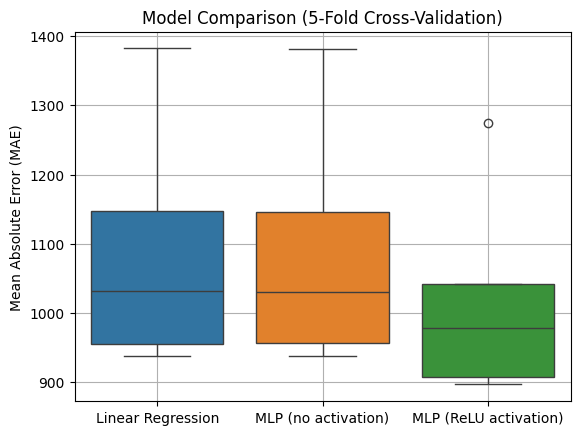

Linear Regression - Mean MAE: 1090.8010, Median MAE: 1032.3305
MLP (no activation) - Mean MAE: 1090.4453, Median MAE: 1030.0412
MLP (ReLU activation) - Mean MAE: 1019.4239, Median MAE: 977.8609


In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# use 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# define models
models = {
    "Linear Regression": LinearRegression(),
    "MLP (no activation)": MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='identity',
        max_iter=5000,
        random_state=42
    ),
    "MLP (ReLU activation)": MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=5000,
        random_state=42
    )
}

# evaluate models
mae_results = {model: [] for model in models}

for train_idx, val_idx in cv.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

        val_mae = mean_absolute_error(y_test, y_val_pred)
        mae_results[name].append(val_mae)

sns.boxplot(data=pd.DataFrame(mae_results))
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison (5-Fold Cross-Validation)")
plt.grid(True)
plt.show()

for model in models.keys():
    print(f"{model} - Mean MAE: {np.mean(mae_results[model]):.4f}, Median MAE: {np.median(mae_results[model]):.4f}")

## 3) Question 6

A Linear Regression model predicts a continuous target variable, *y*, from inputs, *X* by fitting a linear relationship. It is based on the assumption that the underlying relationship between the inputs and the output is linear. This model is valued for its speed during training and its ease of interpretation.

In contrast, a Multi-Layer Perceptron (MLP) Regressor with ReLU (Rectified Linear Unit) activation is a type of neural network capable of learning both linear and nonlinear relationships between inputs and outputs. It consists of multiple layers of neurons, where each neuron applies a weighted sum of its inputs followed by a nonlinear activation function (ReLU, in this case). This nonlinearity allows the network to capture complex patterns in the data. However, MLPs are typically slower to train, require more data, and are more difficult to interpret than Linear Regression models.

An MLP Regressor without an activation function (i.e., with identity activation) behaves similarly to a Linear Regression model because each hidden layer performs only a linear transformation. Stacking multiple linear layers effectively collapses into a single linear transformation, meaning that such a model cannot capture nonlinear relationships. By contrast, when an activation function like ReLU is used, the network introduces nonlinearity, enabling it to represent complex, nonlinear dependencies between features and the target variable.

The main impact of activation functions is therefore to expand the model’s capacity to fit nonlinear patterns in the data. Without them, an MLP behaves like a simple linear model, whereas with them, it becomes far more expressive. In practice, using an activation function (e.g., ReLU) usually leads to better performance on datasets where relationships are not purely linear.

Analyzing the boxplots obtained earlier (question 5), we can observe that the Linear Regression model and the MLP without activation function achieved similar performance, with MAE values close to each other. On the other hand, the MLP with ReLU activation shows a lower median MAE and less variability across the folds (as indicated by the shorter interquartile range and whiskers), leading to the conclusion that it performed better overall. This suggests that the dataset likely contains nonlinear relationships that the MLP with ReLU was able to capture, while the other two models were limited to linear approximations. The improved performance of the MLP with ReLU highlights the advantage of using nonlinear activation functions in neural networks for regression tasks.

## 4) Question 7

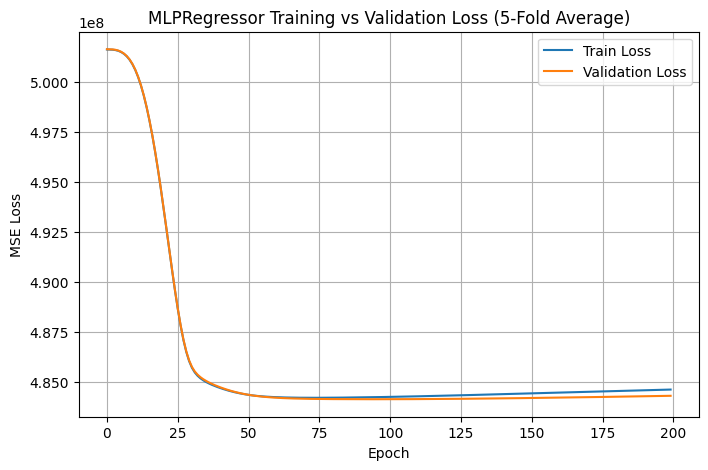

In [8]:
# suppress convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=ConvergenceWarning)

n_epochs = 200
cv = KFold(n_splits=5, shuffle=True, random_state=42)

train_losses = []
val_losses = []

# perform 5-fold cross-validation manually to track training and validation loss per epoch
for fold, (train_idx, val_idx) in enumerate(cv.split(X), start=1):
    # split data into training and validation sets
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # initialize MLPRegressor with warm_start=True to continue training
    model = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=1,
        warm_start=True,
        random_state=42
    )

    train_loss_per_epoch = []
    val_loss_per_epoch = []

    # train for n_epochs epochs
    for epoch in range(n_epochs):
        model.fit(X_train, y_train)  # one epoch of training

        # evaluate on training and validation sets
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        train_loss = mean_squared_error(y_train, y_train_pred)
        val_loss = mean_squared_error(y_val, y_val_pred)

        train_loss_per_epoch.append(train_loss)
        val_loss_per_epoch.append(val_loss)

    train_losses.append(train_loss_per_epoch)
    val_losses.append(val_loss_per_epoch)

train_losses = np.mean(train_losses, axis=0)
val_losses = np.mean(val_losses, axis=0)

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('MLPRegressor Training vs Validation Loss (5-Fold Average)')
plt.legend()
plt.grid(True)
plt.show()

The graph shows a large initial value and sharp decrease in the loss function (MSE) for both training and validation in the first 15-20 epochs (roughly). This indicates that the model is learning the data patterns and improving prediction power. After that, it keeps decreasing but at a much lower rate, flattening the curves. This means that the model is reaching convergence, and, therefore, training it further is not resulting in much improvement.

As we can observe in the graph, training and validation losses have the same evolution throughout epochs, which suggests that the model generalizes well and is neither overfitting or underfitting.

In conclusion, the model converged and managed to lower MSE quickly for both training and validation data, suggesting a good generalization capacity and stable learning behavior.